# Stefan-Maxwell diffusion involving three components


This example demonstrates the modeling of the multicomponent Stefan-Maxwell model involving three componentt.
First we import the Stefan-Maxwell diffusion module

In [43]:
import numpy as np
from Stefan_Maxwell_segmental import Diffusion_MS
import matplotlib.pyplot as plt

The experimental data for this example was taken from Schabel 2006 (https://doi.org/10.1016/j.ces.2006.12.062)

In [44]:
texp=np.asarray([0,4.427792916,14.50035208,23.87257753,33.76909653,45.58674953,58.69408811,71.80142669,91.44521324,120.9089796,147.0930411,177.8656278,212.5493678,264.9136638,429.8518201])

wpvac=np.asarray([0.333333333,0.397028757,0.559683846,0.704648614,0.763915741,0.791401827,0.801167219,0.822653035,0.830878575,0.841458325,0.846286716,0.857199094,0.851138308,0.858388537,0.8723936549])

wtol=np.asarray([0.333333333,0.361083897,0.34858624,0.273123698,0.22781745,0.202716913,0.188759833,0.17692216,0.169121425,0.158541675,0.153713284,0.142800906,0.143816828,0.137082518,0.123003508])

wmet=np.asarray([0.333333333,0.241887346,0.091729914,0.022227687,0.008266808,0.00588126,0.010072947,0.000424805,0,0,0,0,0,0,0])

We want to describe the diffusion of water into an ASD film. The ASD-water mixture is a ternary system. First we define starting and equilibrium weight fractions.

In [45]:
nc=3
L=2E-5
wi0=np.asarray([0.333333333,0.333333333,0.333333333])
wi8=np.asarray([0.00001,0.127606346,0.872393654])
Mi=np.asarray([32.04,92.14,100000])


For a the diffusion of three components, three binary diffusion coefficients need to be defined


$\hat{Ð} =$ 
$\left[\begin{array}{rrr} 
0 & Ð_{12} & Ð_{13} \\ 
0 & 0 & Ð_{23} \\ 
0 & 0 & 0 \\ 
\end{array}\right]$

$Ð_{vec} = \left[\begin{array}{rrr} Ð_{12} & Ð_{13} & Ð_{23} \end{array}\right]$

In [46]:
Dvec=np.asarray([1E-8,2.3E-11,1.7E-11])

Next we define the time array and which component is mobile

In [47]:
nt=100
t=np.linspace(0,texp[-1],nt)
volatile=np.asarray([True,True,False])

In [48]:
wt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,volatile)

------------- Diffusion modeling took 0.7095052 seconds ----------------


We plot the results

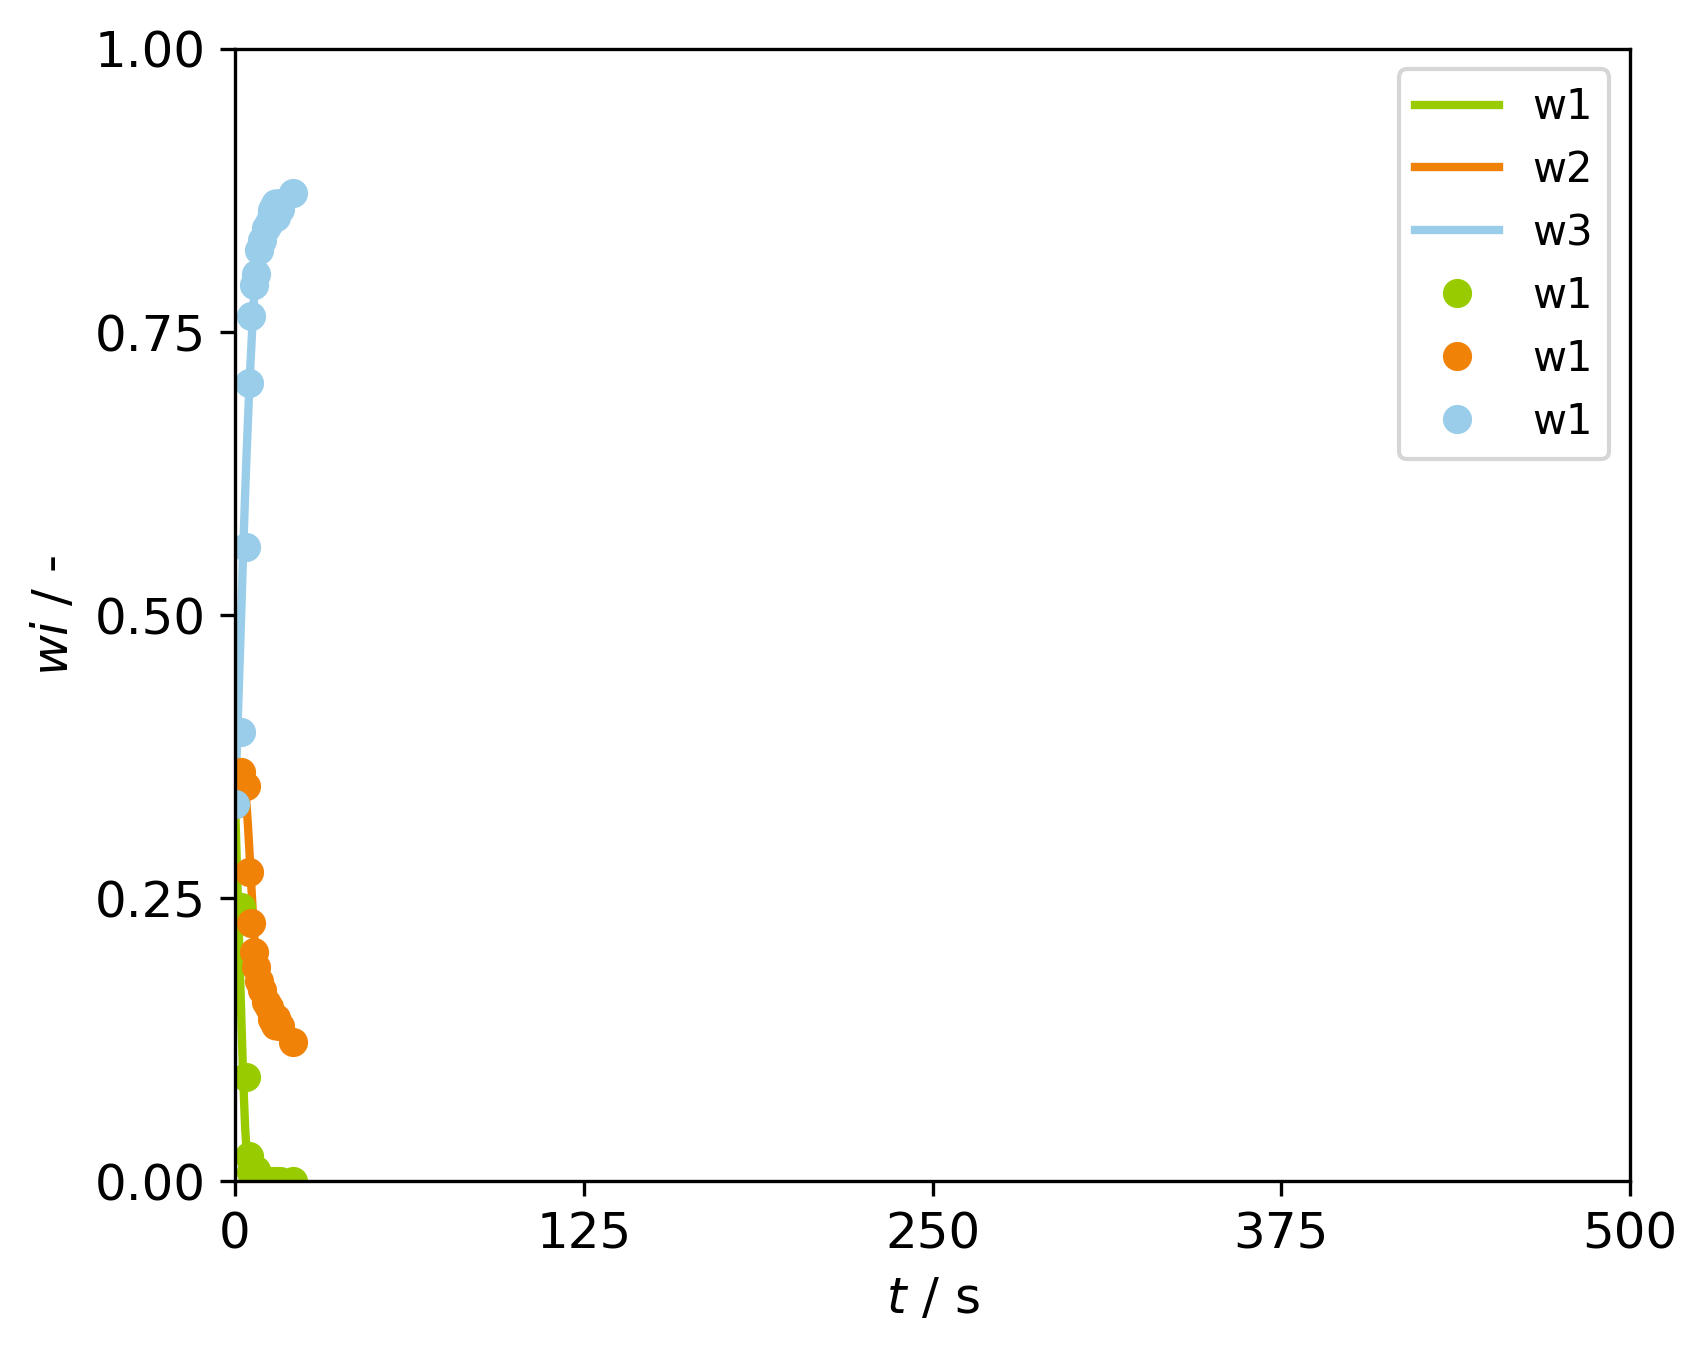

In [49]:

font = {'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

color1 = "#99CC00"
color2 = "#F08208"
color3 = "#99CDE9"

fig, ax = plt.subplots(figsize=(6, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax.plot(t**0.5,wt[:,0], "-",color = color1 , 
        linewidth = 2.0, label = "w1")
ax.plot(t**0.5,wt[:,1], "-",color = color2 , 
        linewidth = 2.0, label = "w2")
ax.plot(t**0.5,wt[:,2], "-",color = color3 , 
        linewidth = 2.0, label = "w3")

ax.plot(texp**0.5,wmet, "o",color = color1 , 
        linewidth = 2.0, label = "w1")
ax.plot(texp**0.5,wtol, "o",color = color2 , 
        linewidth = 2.0, label = "w1")
ax.plot(texp**0.5,wpvac, "o",color = color3 , 
        linewidth = 2.0, label = "w1")


ax.legend(fontsize="small")
ax.set_xlabel('$t$ / s')
ax.set_ylabel('$wi$ / -')
ax.axis([0, 500.**0.5, 0., 1.])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))
plt.show()